<a href="https://colab.research.google.com/github/bonareri/Python-Data-Analysis/blob/main/Food_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

#Loading the data

In [4]:
food_consumption =  pd.read_csv('/content/food_consumption.csv')

#Exploratory Data Analysis

In [5]:
food_consumption.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [6]:
food_consumption.tail()

,country,food_category,consumption,co2_emmission
1425,Bangladesh,Milk - inc. cheese,21.91,31.21
1426,Bangladesh,Wheat and Wheat Products,17.47,3.33
1427,Bangladesh,Rice,171.73,219.76
1428,Bangladesh,Soybeans,0.61,0.27
1429,Bangladesh,Nuts inc. Peanut Butter,0.72,1.27


In [7]:
food_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [8]:
food_consumption.describe()

,consumption,co2_emmission
count,1430.000000,1430.000000
mean,28.110406,74.383993
std,49.818044,152.098566
min,0.000000,0.000000
25%,2.365000,5.210000
50%,8.890000,16.530000
75%,28.132500,62.597500
max,430.760000,1712.000000


In [13]:
food_consumption.columns

Index(['country', 'food_category', 'consumption', 'co2_emmission'], dtype='object')

#Data Cleaning

In [9]:
#sum of missing values
food_consumption.isnull().sum()

,0
country,0
food_category,0
consumption,0
co2_emmission,0


# FOOD CARBON FOOTPRINT Data Analysis

The average C02 emission per person by food category among five countries (Kenya, Uganda, Tanzania, Rwanda and Ethiopia) located in East Africa.

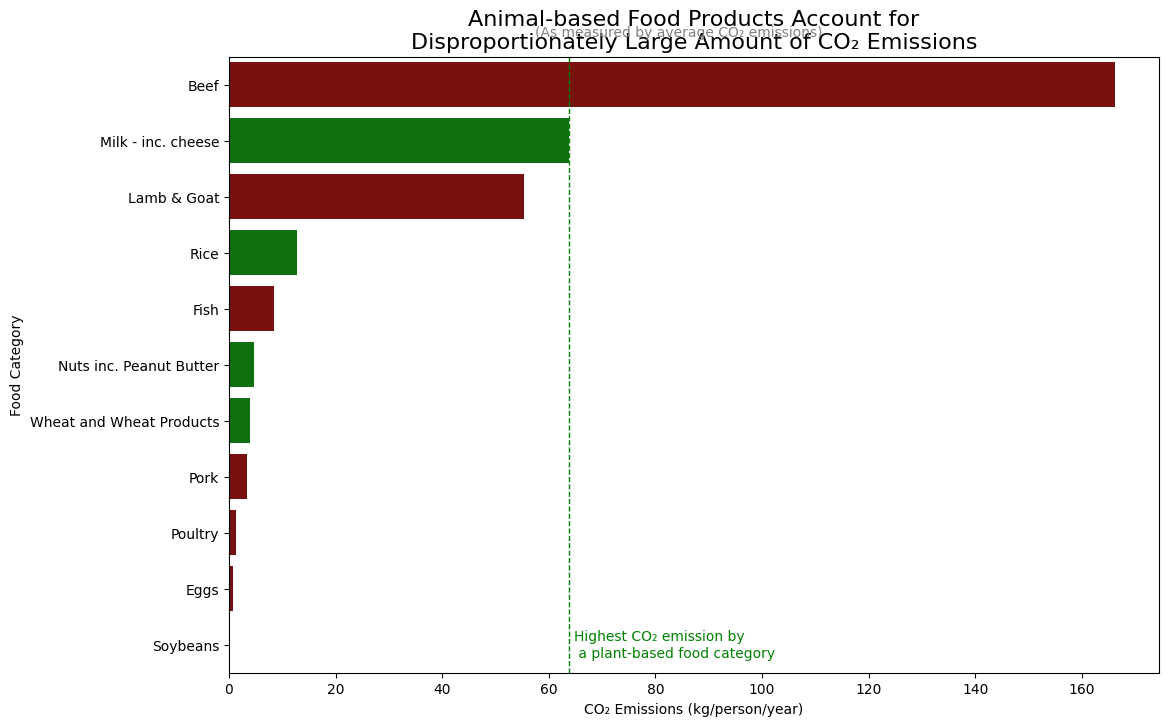

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Rename column for consistency if needed
food_consumption.rename(columns={'co2_emmission': 'co2_emission'}, inplace=True)

# Filter data for the five East African countries
east_african_countries = ['Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Ethiopia']
df_east_africa = food_consumption[food_consumption['country'].isin(east_african_countries)]

# Calculate the average CO₂ emission per person by food category
avg_co2_emission = df_east_africa.groupby('food_category')['co2_emission'].mean().reset_index()

# List of animal-based food categories
animal_based = ['Beef', 'Milk', 'Lamb & Goat', 'Pork', 'Fish', 'Poultry', 'Eggs']

# Categorize food items as 'Animal' or 'Plant'-based
avg_co2_emission['type'] = avg_co2_emission['food_category'].apply(lambda x: 'Animal' if x in animal_based else 'Plant')

# Sort the data by CO₂ emission in descending order
avg_co2_emission = avg_co2_emission.sort_values(by='co2_emission', ascending=False)

# Set colors based on category type and convert to a list
colors = avg_co2_emission['type'].map({'Animal': 'darkred', 'Plant': 'green'}).tolist()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_co2_emission, x='co2_emission', y='food_category', palette=colors)

# Add title and subtitle to match the reference image
plt.title("Animal-based Food Products Account for\nDisproportionately Large Amount of CO₂ Emissions", fontsize=16)
plt.suptitle("(As measured by average CO₂ emissions)", fontsize=10, y=0.92, color='gray')

# Label axes
plt.xlabel("CO₂ Emissions (kg/person/year)")
plt.ylabel("Food Category")

# Highlight the highest plant-based CO₂ emission with a dashed line and annotation
max_plant_emission = avg_co2_emission[avg_co2_emission['type'] == 'Plant']['co2_emission'].max()
plt.axvline(max_plant_emission, color='green', linestyle='--', linewidth=1)
plt.text(max_plant_emission + 1, len(avg_co2_emission) - 1, "Highest CO₂ emission by\n a plant-based food category", color="green", va='center')

# Show plot
plt.show()